# Week 11 Prac: Support Vector Machine

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# Load the diabetes dataset
df = pd.read_csv("diabetes.csv")

# Define features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (positive/negative diagnosis)

# Shuffle and split the data (random_state=42)
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

### Q1

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Train an SVM on the above data using a linear kernel and set parameter C = 1
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

### Q2

Train accuracy: 77.36%
Holdout accuracy: 75.32%


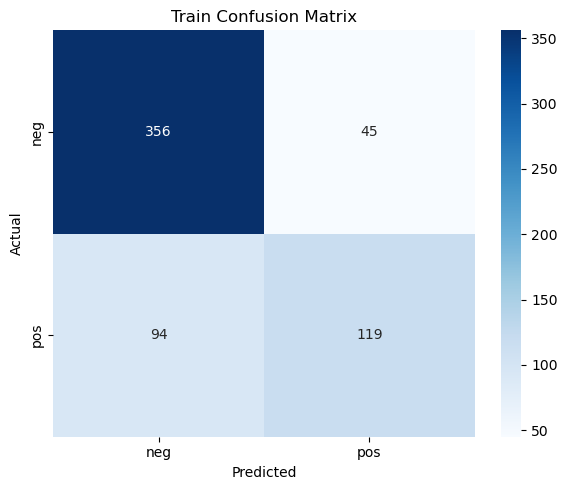

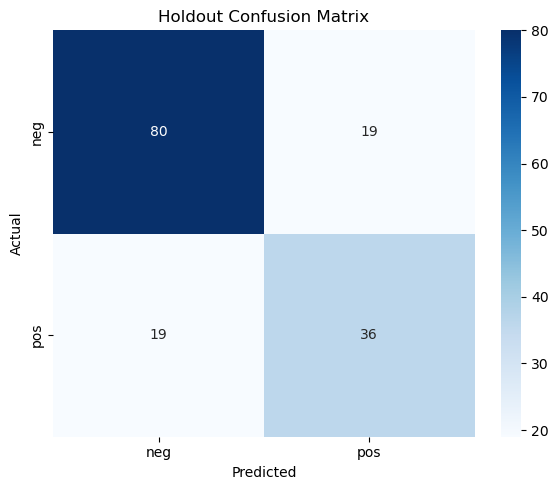

In [13]:
# Predict for train and holdout dataset
y_pred_train = svm.predict(X_train)
y_pred_holdout = svm.predict(X_holdout)

# Compute the accuracy score
train_accuracy = accuracy_score(y_train, y_pred_train)
holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)

print(f"Train accuracy: {np.round(train_accuracy*100, 2)}%")
print(f"Holdout accuracy: {np.around(holdout_accuracy*100, 2)}%")

def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Compute the confusion matrices
train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
holdout_confusion_matrix = confusion_matrix(y_holdout, y_pred_holdout)

# Define class names
class_names = np.unique(y_train)

# Plot both
plot_confusion_matrix(train_confusion_matrix, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(holdout_confusion_matrix, class_names, title='Holdout Confusion Matrix')

### Q3

List of C values: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Fitting with C value: 0.001
  Train accuracy: 77.52%
  Holdout accuracy: 74.03%
Fitting with C value: 0.01
  Train accuracy: 77.52%
  Holdout accuracy: 73.38%
Fitting with C value: 0.1
  Train accuracy: 77.36%
  Holdout accuracy: 75.32%
Fitting with C value: 1
  Train accuracy: 77.36%
  Holdout accuracy: 75.32%
Fitting with C value: 10
  Train accuracy: 77.36%
  Holdout accuracy: 76.62%
Fitting with C value: 100
  Train accuracy: 77.04%
  Holdout accuracy: 73.38%
Fitting with C value: 1000
  Train accuracy: 77.04%
  Holdout accuracy: 73.38%


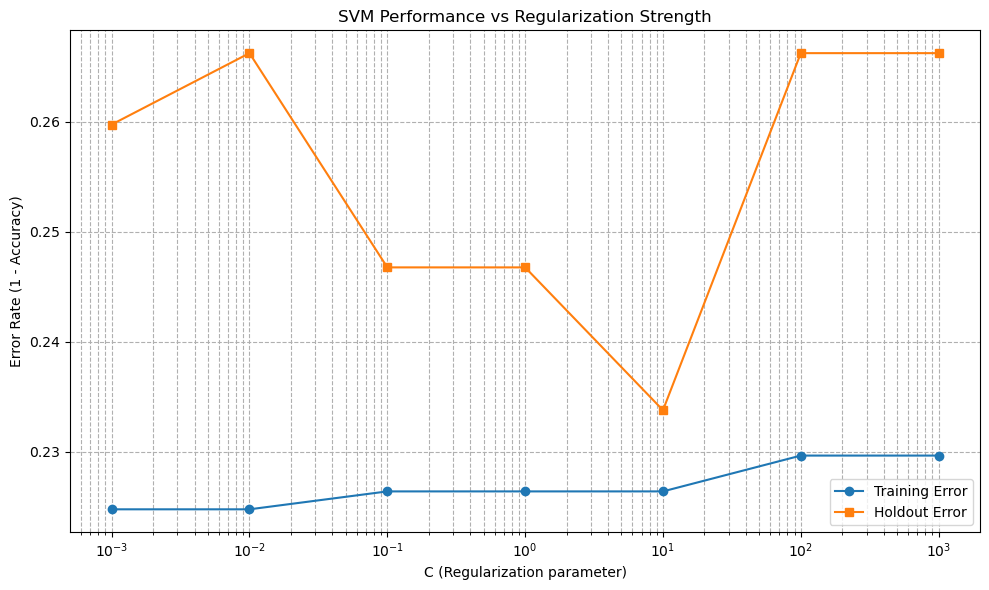

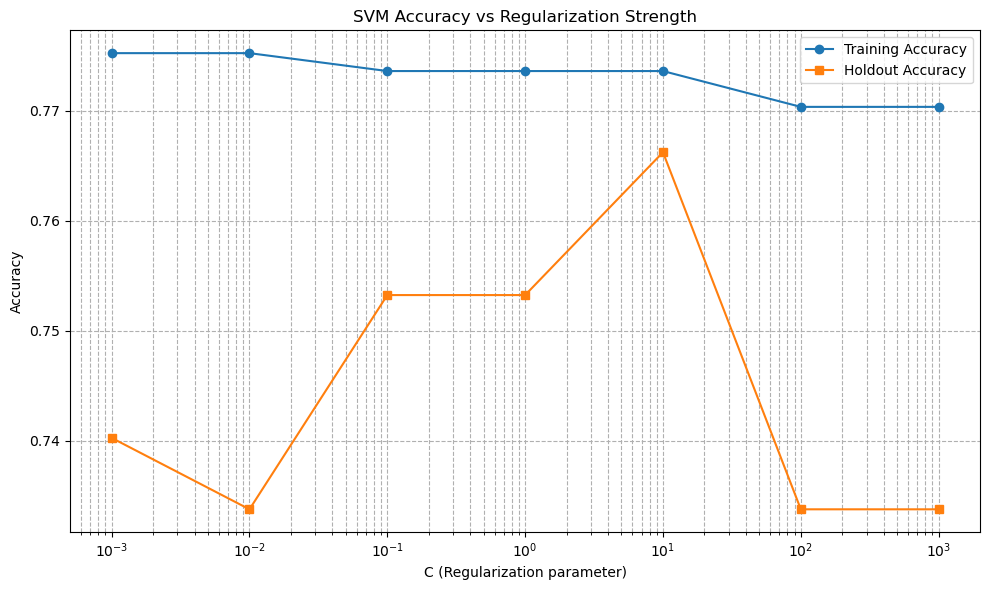

Best C value: 10 with holdout accuracy: 76.62%


In [18]:
# Create a list of C values to try (logarithmic scale)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
print(f"List of C values: {C_values}")

# Train and evaluate a model for each C value
train_accuracy_list = []
holdout_accuracy_list = []

for C in C_values:
    print(f"Fitting with C value: {C}")
    
    # Train SVM
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train, y_train)
    
    # Predict target values
    y_pred_train = svm.predict(X_train)
    y_pred_holdout = svm.predict(X_holdout)
    
    # Calculate and record accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
    
    train_accuracy_list.append(train_accuracy)
    holdout_accuracy_list.append(holdout_accuracy)
    
    print(f"  Train accuracy: {np.round(train_accuracy*100, 2)}%")
    print(f"  Holdout accuracy: {np.round(holdout_accuracy*100, 2)}%")

# Plot the training and testing error as a function of C
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, [1 - acc for acc in train_accuracy_list], 'o-', label='Training Error')
plt.semilogx(C_values, [1 - acc for acc in holdout_accuracy_list], 's-', label='Holdout Error')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('SVM Performance vs Regularization Strength')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

# Also plot accuracy
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracy_list, 'o-', label='Training Accuracy')
plt.semilogx(C_values, holdout_accuracy_list, 's-', label='Holdout Accuracy')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs Regularization Strength')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

# Find the best C value
best_C_index = np.argmax(holdout_accuracy_list)
best_C = C_values[best_C_index]
print(f"Best C value: {best_C} with holdout accuracy: {np.round(holdout_accuracy_list[best_C_index]*100, 2)}%")

### Q4

List of C values: [0, 20, 40, 60, 80, 100]
List of kernel functions: ['linear', 'poly', 'rbf', 'sigmoid']
Plotting with Kernel function: linear
  C=0, Train accuracy: 76.87%, Holdout accuracy: 77.92%
  C=20, Train accuracy: 77.69%, Holdout accuracy: 76.62%
  C=40, Train accuracy: 77.69%, Holdout accuracy: 78.57%
  C=60, Train accuracy: 77.69%, Holdout accuracy: 75.97%
  C=80, Train accuracy: 76.55%, Holdout accuracy: 74.68%
  C=100, Train accuracy: 77.04%, Holdout accuracy: 73.38%
Plotting with Kernel function: poly
  C=0, Train accuracy: 65.31%, Holdout accuracy: 64.29%
  C=20, Train accuracy: 78.5%, Holdout accuracy: 76.62%
  C=40, Train accuracy: 78.83%, Holdout accuracy: 75.97%
  C=60, Train accuracy: 79.15%, Holdout accuracy: 75.97%
  C=80, Train accuracy: 79.64%, Holdout accuracy: 75.32%
  C=100, Train accuracy: 79.15%, Holdout accuracy: 75.32%
Plotting with Kernel function: rbf
  C=0, Train accuracy: 65.31%, Holdout accuracy: 64.29%
  C=20, Train accuracy: 78.34%, Holdout accura

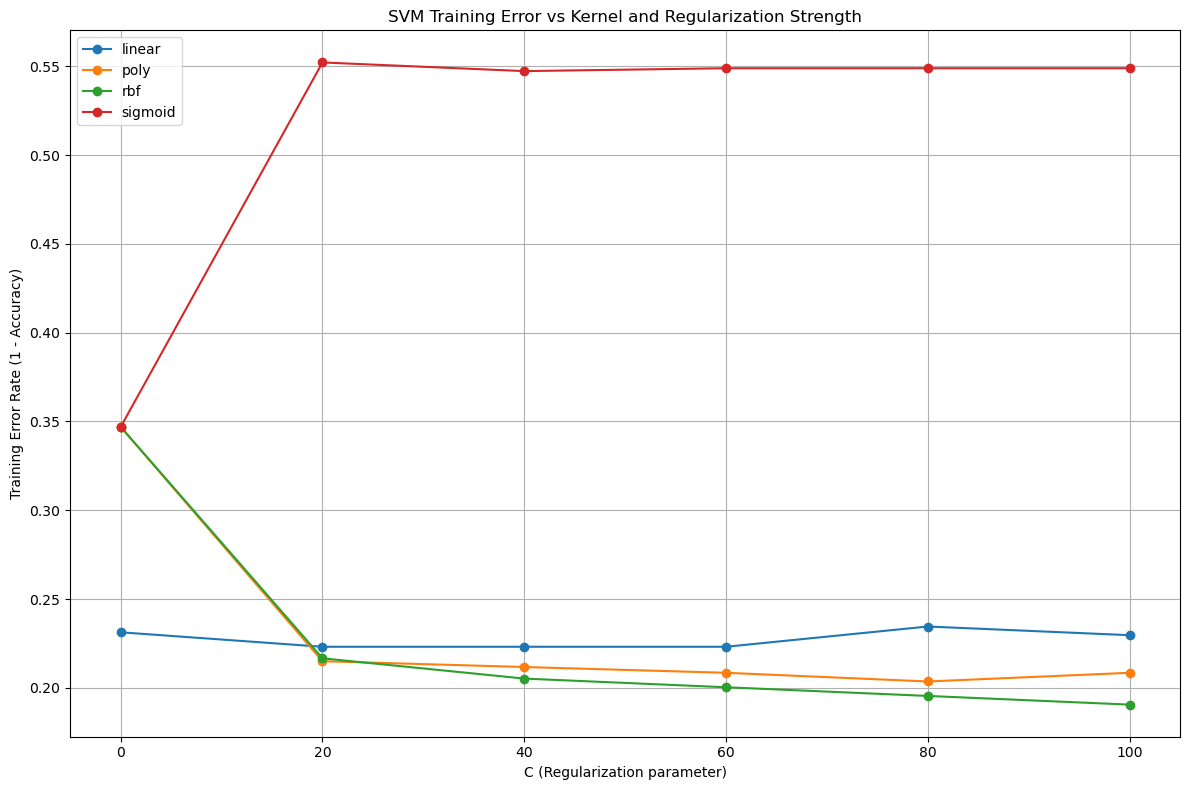

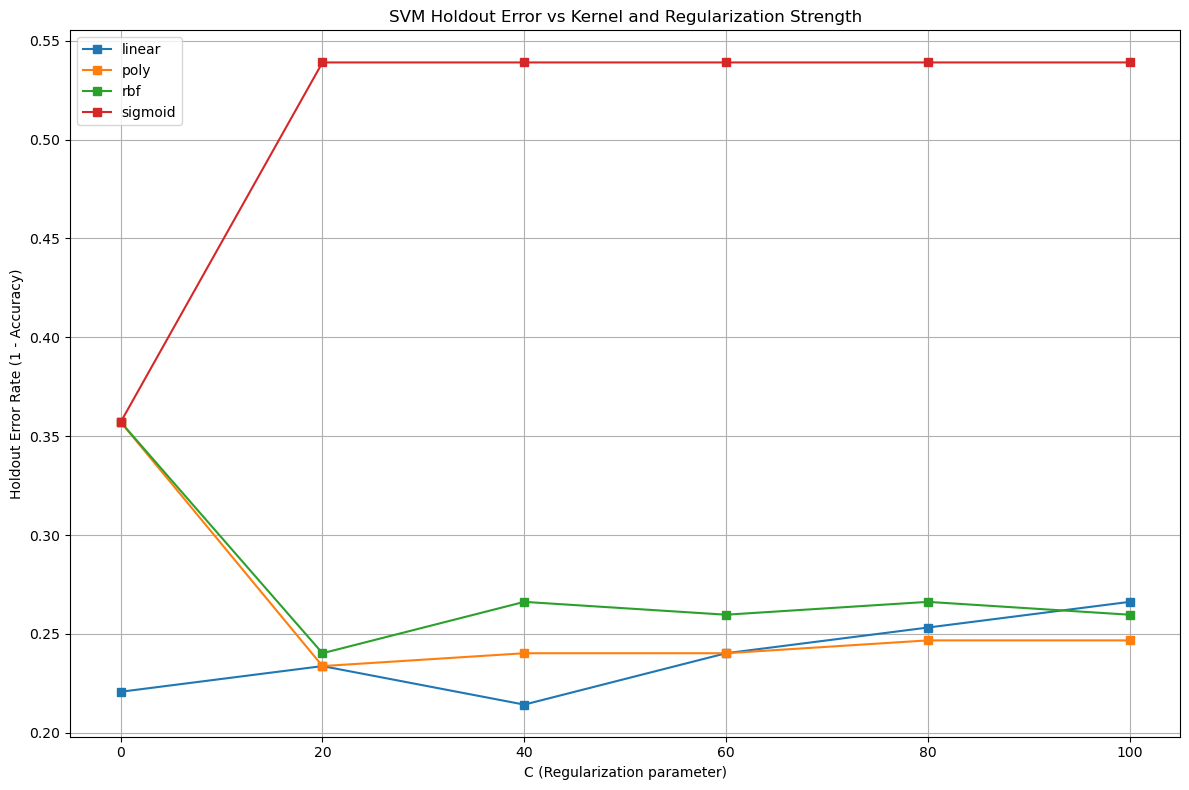

Best combination: kernel=linear, C=40 with holdout accuracy: 78.57%


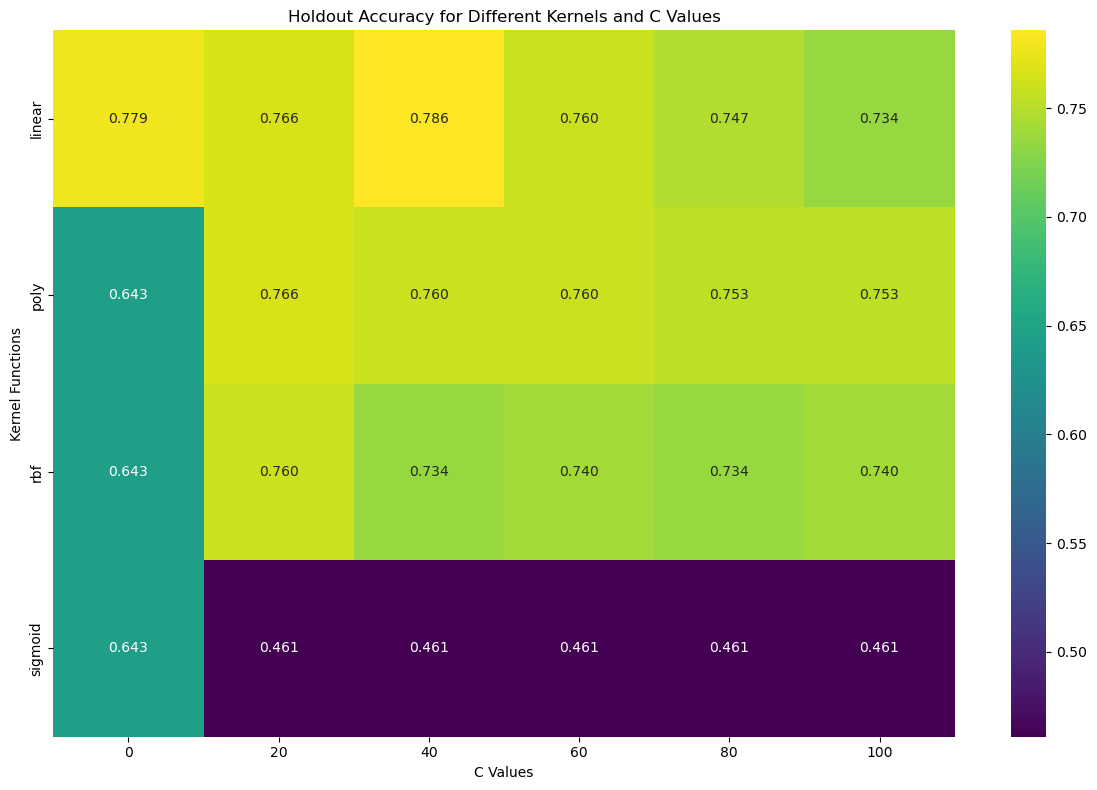

In [22]:
# Create a list of C values to try
C_values = [0, 20, 40, 60, 80, 100]
print(f"List of C values: {C_values}")

# Create a list of kernel functions to try
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']
print(f"List of kernel functions: {kernel_functions}")

# Storage for results
results = {}

# Train and evaluate a model for each kernel function and C value
for kernel in kernel_functions:
    print(f"Plotting with Kernel function: {kernel}")
    
    kernel_train_accuracy = []
    kernel_holdout_accuracy = []
    
    for C in C_values:
        # Note: C=0 is technically invalid (will use a small value instead)
        actual_C = 0.0001 if C == 0 else C
        
        # Train SVM
        svm = SVC(kernel=kernel, C=actual_C, random_state=42)
        svm.fit(X_train, y_train)
        
        # Predict target values
        y_pred_train = svm.predict(X_train)
        y_pred_holdout = svm.predict(X_holdout)
        
        # Calculate and record accuracy
        train_accuracy = accuracy_score(y_train, y_pred_train)
        holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
        
        kernel_train_accuracy.append(train_accuracy)
        kernel_holdout_accuracy.append(holdout_accuracy)
        
        print(f"  C={C}, Train accuracy: {np.round(train_accuracy*100, 2)}%, Holdout accuracy: {np.round(holdout_accuracy*100, 2)}%")
    
    # Store results for this kernel
    results[kernel] = {
        'train_accuracy': kernel_train_accuracy,
        'holdout_accuracy': kernel_holdout_accuracy
    }

# Plot the training error as a function of kernel and C
plt.figure(figsize=(12, 8))
for kernel in kernel_functions:
    plt.plot(C_values, [1 - acc for acc in results[kernel]['train_accuracy']], 'o-', label=f'{kernel}')

plt.xlabel('C (Regularization parameter)')
plt.ylabel('Training Error Rate (1 - Accuracy)')
plt.title('SVM Training Error vs Kernel and Regularization Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the testing error as a function of kernel and C
plt.figure(figsize=(12, 8))
for kernel in kernel_functions:
    plt.plot(C_values, [1 - acc for acc in results[kernel]['holdout_accuracy']], 's-', label=f'{kernel}')

plt.xlabel('C (Regularization parameter)')
plt.ylabel('Holdout Error Rate (1 - Accuracy)')
plt.title('SVM Holdout Error vs Kernel and Regularization Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the best kernel and C value combination
best_accuracy = 0
best_kernel = ''
best_C = 0

for kernel in kernel_functions:
    max_accuracy_index = np.argmax(results[kernel]['holdout_accuracy'])
    if results[kernel]['holdout_accuracy'][max_accuracy_index] > best_accuracy:
        best_accuracy = results[kernel]['holdout_accuracy'][max_accuracy_index]
        best_kernel = kernel
        best_C = C_values[max_accuracy_index]

print(f"Best combination: kernel={best_kernel}, C={best_C} with holdout accuracy: {np.round(best_accuracy*100, 2)}%")

# Create a heatmap showing performance across kernels and C values
plt.figure(figsize=(12, 8))
heatmap_data = np.zeros((len(kernel_functions), len(C_values)))

for i, kernel in enumerate(kernel_functions):
    for j, _ in enumerate(C_values):
        heatmap_data[i, j] = results[kernel]['holdout_accuracy'][j]

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='viridis', 
            xticklabels=[str(c) for c in C_values], 
            yticklabels=kernel_functions)
plt.xlabel('C Values')
plt.ylabel('Kernel Functions')
plt.title('Holdout Accuracy for Different Kernels and C Values')
plt.tight_layout()
plt.show()